# Thread Merging/Curating for GCaMP Extractor

Basically the goal is to reduce the amount of curation time necessary for end-users of GCaMP extractor so they don't have to go through and click through every blob thread

In [1]:
## Basically loading the extractor

from gcamp_extractor import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from fastcluster import linkage

# load an extractor
arguments = {
    "root": "/Users/stevenban/Desktop/20191104_KP_FC083_worm6_gcamp6s_1/", 
    "numz": 10, 
    "frames": [0, 1, 2, 3, 4, 5], 
    "offset": 23, 
    #"t": 1000, 
    "gaussian": [25, 2, 3, 1], 
    "quantile": 0.98, 
    "reg_peak_dist": 4, 
    "anisotropy": [10, 1, 1], 
    "blob_merge_dist_thresh": 5, 
    "register_frames": False, 
    "predict": False, 
    "regen_mft": False, 
    "3d": False, 
    "regen": False
}


In [2]:
e = Extractor(**arguments)
e.calc_blob_threads()
e.quantify()

Frames Processed: 9997/9997
Infilling...
Blob Threads Checked: 240/240

Saving blob timeseries as numpy object...
Frames Processed (Quantification): 9997/9997
Saved timeseries as text file...


In [4]:
e.spool.make_allthreads()
e.save_threads()
os.rename(arguments['root']+'extractor-objects',arguments['root']+'extractor-objects-dev')

Saving blob threads as pickle object...


In [5]:
del e
import gc
gc.collect()

e = load_extractor(arguments['root']+'extractor-objects-dev')

In [2]:
import gc
arguments = {"root": "/Users/stevenban/Desktop/20191203_KP_FC083_worm17_gcamp6f_1/",
 "numz": 13,
 "frames": [0,1,2,3,4,5,6,7,8],
 "offset": 13,
 "gaussian": [51,8,3,1],
 "quantile": 0.985,
 "reg_peak_dist": 7,
 "anisotropy": [15,1,1],
 "blob_merge_dist_thresh": 7,
 "register_frames": True,
 "predict": False,
 "regen_mft": False,
 "3d": False,
 "regen": False
}
e = Extractor(**arguments)
e.calc_blob_threads()
e.spool.make_allthreads()
e.save_threads()
e.quantify()
os.rename(arguments['root']+'extractor-objects',arguments['root']+'extractor-objects-dev')

Frames Processed: 3816/3816
Infilling...
Blob Threads Checked: 3208/3208

Saving blob timeseries as numpy object...
Saving blob threads as pickle object...
Frames Processed (Quantification): 3816/3816
Saved timeseries as text file...


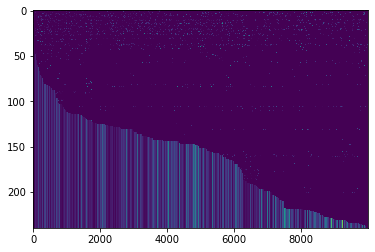

In [17]:
# Curating based on the difference between thread movement and the calculated global movement vector

dS = np.zeros((len(e.spool.threads), e.t-1))

for i in range(len(e.spool.threads)):
	dS[i] = np.linalg.norm(np.diff(e.spool.threads[i].positions, n=1, axis =0)-e.spool.dvec[1:], axis = 1)

plt.imshow(dS, aspect = 'auto')
#plt.imshow(e.spool.dvec.T, aspect='auto')
plt.show()

In [13]:
len(e.spool.threads)

240

In [14]:
np.diff(e.spool.threads[i].positions, n=1, axis =0).shape

(9996, 3)

In [15]:
e.spool.dvec[1:].shape

(9996, 3)

In [20]:
import json
with open(arguments['root']+'extractor-objects1/curate.json') as f:
    a = json.load(f)

In [ ]:
dir(e.spool)

In [ ]:
dir(e)